<a href="https://colab.research.google.com/github/Ana1890/Brain-Tumor-Classification/blob/main/Brain_Tumor_Classification_Repo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

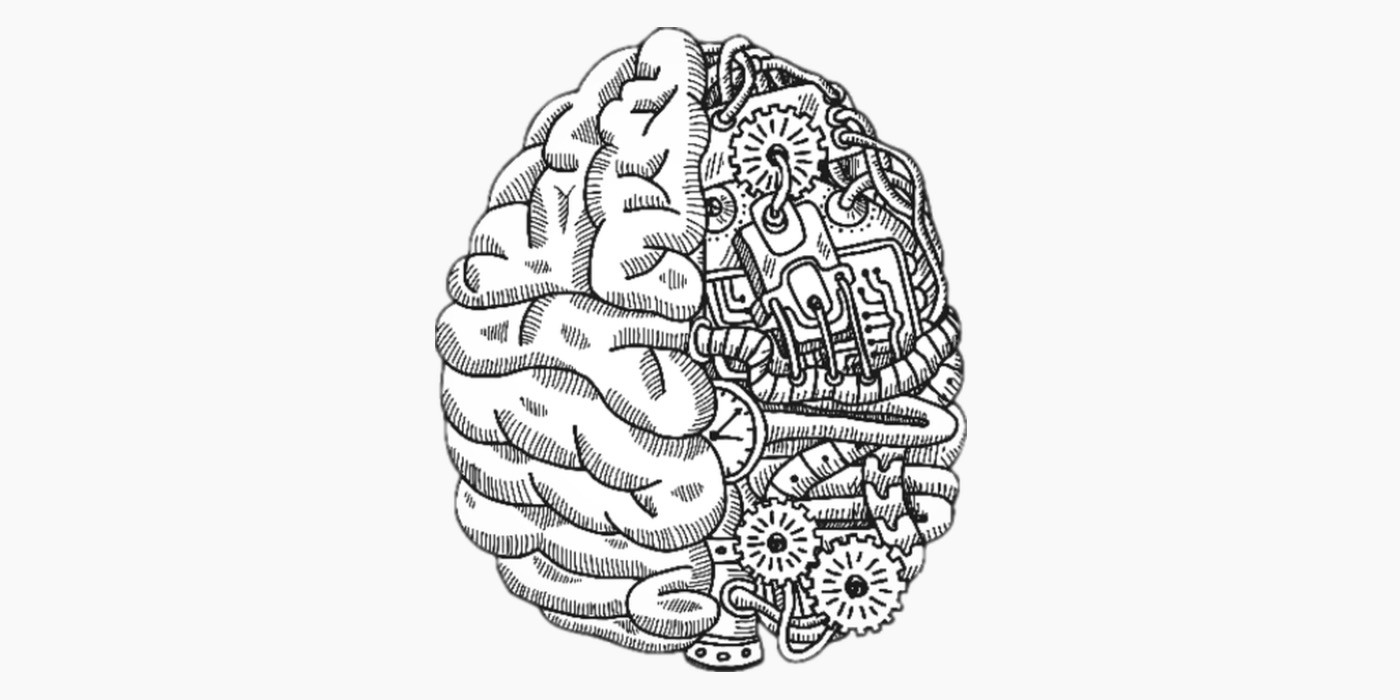

In [1]:
from google.colab import drive
drive.mount('/content/drive')
#/content/gdrive/My Drive/


Mounted at /content/drive


**Importar librerias**

In [2]:
drive = '/content/drive/MyDrive'
name_folder = '/Brain Tumor Classification/RECURSOS DEL TALLER'
path=drive+name_folder

import os
#Comprobar que estamos dentro de Drive
for dirname, _, filenames in os.walk(path):
  for filename in filenames:
    if filename==filenames[0]:
      print(os.path.join(dirname, filename))

/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/BrainTumorClassification.ipynb
/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/.ipynb_checkpoints/BrainTumorClassification-checkpoint.ipynb
/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/data/BrainTumorClassification.ipynb
/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/data/Testing/glioma_tumor/image(4).jpg
/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/data/Testing/no_tumor/image(14).jpg
/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/data/Testing/pituitary_tumor/image(13).jpg
/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/data/Testing/meningioma_tumor/image(34).jpg
/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/data/Training/glioma_tumor/gg (15).jpg
/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/data/Training/no_tumor/8.jpg
/content/dri

In [3]:
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# **Cargar datos**


Found 2441 images belonging to 4 classes.
Found 429 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


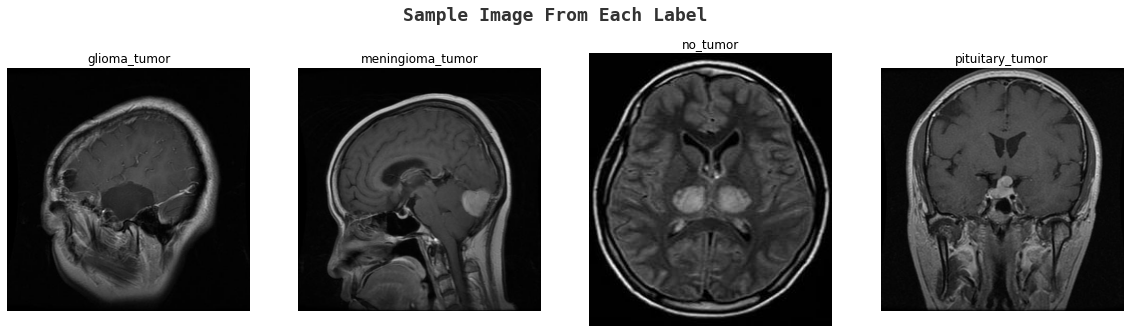

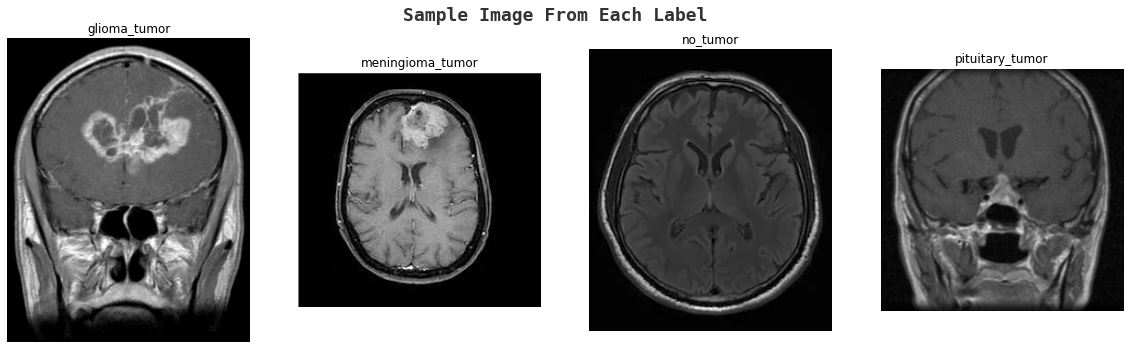

In [7]:
################################
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2


#train
def cargar_datos_train(image_size, batch_size,class_mode, data_augmentation='FALSE'):

    if data_augmentation==True:
        datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True, rescale=1./255, validation_split=0.15) #Aumento de datos con transformaciones geométricas en la imagen.

    else:
        datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15) 

      #Cargamos las imágenes desde las carpetas
    train = datagen.flow_from_directory(directory=path+'/data/Training', batch_size=batch_size, class_mode=class_mode,
                                                  color_mode='rgb', target_size=(image_size, image_size),
                                                  shuffle=True, subset='training')

    val = datagen.flow_from_directory(directory=path+'/data/Training', batch_size=batch_size, class_mode=class_mode,
                                                  color_mode='rgb', target_size=(image_size, image_size),
                                                  shuffle=False, subset='validation')

      #Representar  imagen de cada clase
    k=0
    fig, ax = plt.subplots(1,4,figsize=(20,20))
    fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
                      fontname='monospace',y=0.62,x=0.4,alpha=0.8)
            
    index = 0
    for i in range(len(labels)):
        index = len(train.classes[train.classes==i]) - 1 + index
        img = cv2.imread(path+'/data/Training/'+train.filenames[index])
        ax[k].imshow(img,cmap='gray')
        ax[k].set_title(labels[i])
        ax[k].axis('off')
        k=k+1

    return train, val


image_size= 128
batch_size= 16
class_mode= 'categorical' # MÁS DE 2 CLASES
data_augmentation= True 

train, val = cargar_datos_train(image_size, batch_size,class_mode, data_augmentation=data_augmentation)


#TEST
def cargar_datos_test(image_size, batch_size,class_mode, data_augmentation='FALSE'):
    
    if data_augmentation==True:
        datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True, rescale=1./255, validation_split=0.15) #Aumento de datos con transformaciones geométricas en la imagen.

    else:
        datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15) 

      #Cargamos las imágenes desde las carpetas
    test = datagen.flow_from_directory(directory=path+'/data/Testing', batch_size=batch_size, class_mode=class_mode,
                                                  color_mode='rgb', target_size=(image_size, image_size),
                                                  shuffle=False)


      #Representar  imagen de cada clase
    k=0
    fig, ax = plt.subplots(1,4,figsize=(20,20))
    fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
                  fontname='monospace',y=0.62,x=0.4,alpha=0.8)
    index = 0
    for i in range(len(labels)):
        index = len(test.classes[test.classes==i]) - 1 + index
        img = cv2.imread(path+'/data/Testing/'+test.filenames[index])
        ax[k].imshow(img,cmap='gray')
        ax[k].set_title(labels[i])
        ax[k].axis('off')
        k=k+1

    return test


image_size= 128
batch_size= 16
class_mode= 'categorical' # MÁS DE 2 CLASES
data_augmentation= False

test = cargar_datos_test(image_size, batch_size,class_mode, data_augmentation=data_augmentation)

* En train shuffle es True y en test y val shuffle es False

# Modelo

In [9]:
#Ejemplo:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
import tensorflow.keras as keras
from tensorflow.keras.applications import VGG16 

#Definir parte de extracción de características
def modelo_preentrenado(input_shape):
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
  base_model.trainable=False

  return base_model

#Tipo 1
def EXAMPLE_MODEL(input_shape):
  base_model = Sequential() #empezar
  base_model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape)) #primera capa
  base_model.add(Conv2D(64, kernel_size=3, activation='relu'))
  base_model.add(MaxPool2D(pool_size=2))
  base_model.add(Conv2D(32, kernel_size=3, activation='relu')) #capas intermedias
  base_model.add(MaxPool2D(pool_size=2))
  base_model.add(Conv2D(16, kernel_size=3, activation='relu'))
  base_model.add(Conv2D(16, kernel_size=3, activation='relu',  name="last_layer")) #capas intermedias
  return base_model

#Tipo 2
def OWN_MODEL(input_shape):
  ?
  return base_model

## Top model

In [10]:
# Definir top model
def _get_top_model(base_model, top_model, num_classes):
    # Convierte la información a un vector antes de entrar al clasificador
    output = base_model.layers[-1].output

    if top_model == 'GMP':# global max pooling
        x = keras.layers.GlobalMaxPooling2D()(output)

    elif top_model == 'GAP':#global average pooling
        x = keras.layers.GlobalAveragePooling2D()(output)

    elif top_model == "FD":#flatten
        x = keras.layers.Flatten()(output)
        x = keras.layers.Dense(1024, activation='relu')(x)
        x = keras.layers.Dropout(0.25)(x)
        x = keras.layers.Dense(256, activation='relu')(x)

    out = keras.layers.Dense(num_classes, activation='softmax')(x) #4clases

    model = keras.Model(inputs=base_model.input, outputs=out)
    model.summary()
    return model

In [11]:
top_model= 'FD'#'GMP' #GAP, FD, GMP
n_classes=len(labels)

base_model=modelo_preentrenado(input_shape=(image_size,image_size,3))
model1=_get_top_model(base_model, top_model, n_classes)


base_model=EXAMPLE_MODEL(input_shape=(image_size,image_size,3))
model2=_get_top_model(base_model, top_model, n_classes)


58900480/58889256 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

## Optimizadores

In [12]:
def _get_optimizer(optimizer_model, lr_n):
    print("[INFO] Getting the optimizer: ", optimizer_model)
    # Initiate the optimizer.
    if optimizer_model == 'Adam':
        opt = Adam(lr_n)

    elif optimizer_model == 'Adagrad':
        opt = Adagrad(lr_n)

    elif optimizer_model == 'Adadelta':
        opt = Adadelta(lr_n)

    elif optimizer_model == 'SGD':
        opt = SGD(lr_n)
    else:
        raise ValueError('Optimizer not implemented yet!')
    return opt

def plot_learningcurves(H):
  # Save curves training
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(H.history['accuracy'])
  plt.plot(H.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

  plt.figure()
  plt.plot(H.history['loss'])
  plt.plot(H.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

# Entrenamiento

Found 2441 images belonging to 4 classes.
Found 429 images belonging to 4 classes.
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4_input (InputLayer)  [(None, 64, 64, 3)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
152/152 [==============================] - 1600s 10s/step - loss: 1.2728 - accuracy: 0.4198 - val_loss: 1.1503 - val_accuracy: 0.4207
Epoch 2/10
152/152 [==============================] - 17s 115ms/step - loss: 0.9351 - accuracy: 0.6095 - val_loss: 1.6525 - val_accuracy: 0.3005
Epoch 3/10
152/152 [==============================] - 17s 114ms/step - loss: 0.7173 - accuracy: 0.6990 - val_loss: 0.9650 - val_accuracy: 0.5649
Epoch 4/10
152/152 [==============================] - 18s 118ms/step - loss: 0.5718 - accuracy: 0.7757 - val_loss: 0.9803 - val_accuracy: 0.5697
Epoch 5/10
152/152 [==============================] - 18s 117ms/step - loss: 0.4784 - accuracy: 0.8157 - val_loss: 0.9379 - val_accuracy: 0.6034
Epoch 6/10
152/152 [==============================] - 18s 117ms/step - loss: 0.3593 - accuracy: 0.8643 - val_loss: 0.9904 - val_accuracy: 0.6587
Epoch 7/10
152/152 [==============================] - 18s 117ms/step - loss: 0.2903 - accuracy: 0.8965 - val_loss: 1.0914 - val_ac

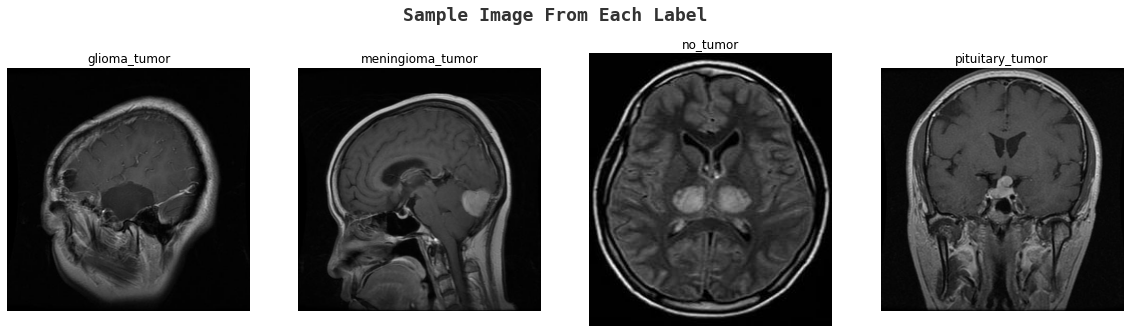

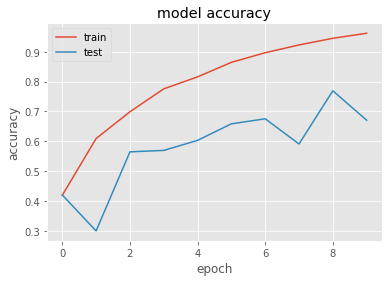

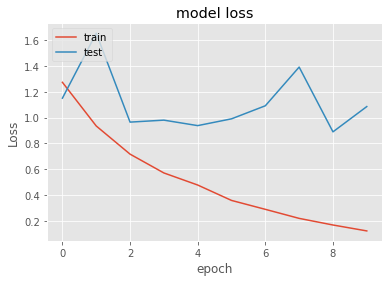

In [13]:
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, SGD
from keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report


# Define las variables
image_size=64
batch_size=16
data_augmentation=False
class_mode= 'categorical'
train, val = cargar_datos_train(image_size, batch_size,class_mode, data_augmentation=data_augmentation)

# Estos parámetros dependen del dataset que estemos utilizando
optimizer='Adagrad' #'SGD','Adam', 'Adadelta', 'Adagrad'
loss_fun= 'categorical_crossentropy' #más de 2 clases
learning_rate= 0.01 #0.5

n_classes = len(labels)
num_epochs=10 # cantidad de oportunidades


#Definir el modelo
base_model=EXAMPLE_MODEL(input_shape=(image_size,image_size,3))
model=_get_top_model(base_model, top_model, n_classes)


model.compile(optimizer=_get_optimizer(optimizer, learning_rate), loss=loss_fun, metrics=['accuracy'])

#Entrenamiento
print('[INFO] Training model')
H = model.fit_generator(generator=train, steps_per_epoch=train.n//train.batch_size,
                                      epochs=num_epochs, verbose=1, validation_data=val,
                                      validation_steps=val.n//val.batch_size)
plot_learningcurves(H)


Con optimizer='adagrad' llega a mejores resultados en el mismo tiempo

# Evaluación

Found 394 images belonging to 4 classes.


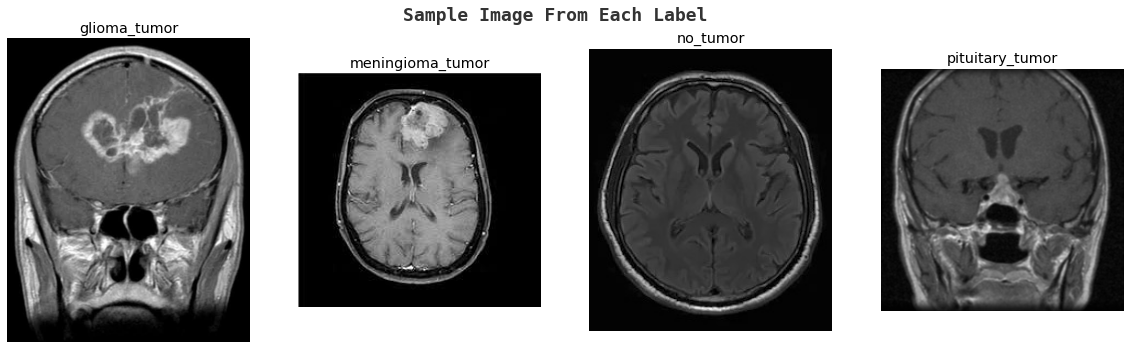

In [14]:
#Evaluación
test = cargar_datos_test(image_size, batch_size, class_mode, data_augmentation=data_augmentation)

In [15]:
labels

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [16]:
np.unique(test.labels)

array([0, 1, 2, 3], dtype=int32)

In [17]:
preds = model.predict_generator(test)

y_pred = preds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [18]:
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_true = test.labels
y_true=np.array(y_true)
# # la probabilidad de que sea un no tumor:
# y_pred=np.array(y_pred[:,0])
y_pred = np.array(y_pred)  

#print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=labels))

## Clean GPU memory
# del model
# tf.keras.backend.clear_session()

                  precision    recall  f1-score   support

    glioma_tumor       0.89      0.17      0.29       100
meningioma_tumor       0.60      0.99      0.75       115
        no_tumor       0.64      0.95      0.76       105
 pituitary_tumor       0.85      0.31      0.46        74

        accuracy                           0.64       394
       macro avg       0.75      0.61      0.56       394
    weighted avg       0.73      0.64      0.58       394



In [20]:
print(confusion_matrix(y_true, y_pred))

[[ 17  40  41   2]
 [  0 114   1   0]
 [  1   2 100   2]
 [  1  35  15  23]]
